In [23]:
# KNN sobre el dataset Iris usando distintos pares de columnas (con y sin escalar)
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [5]:
# Cargar el dataset Iris
iris = datasets.load_iris()
X = iris.data  # las 4 características
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [6]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
# Definir los valores de K que se van a probar
k_values = [2, 3, 5, 7, 9, 12]

# Crear todos los pares posibles de columnas (combinaciones de 2 entre 4)
combinations = list(itertools.combinations(range(4), 2))

In [13]:
combinations

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

In [14]:
# Función para evaluar y graficar accuracy
def evaluate_knn_accuracy(X, y, title_prefix):
    plt.figure(figsize=(15, 25))
    for idx, (i, j) in enumerate(combinations):
        X_pair = X[:, [i, j]]
        X_train, X_test, y_train, y_test = train_test_split(X_pair, y, test_size=0.3, random_state=42)

        accuracies = []
        for k in k_values:
            clf = KNeighborsClassifier(n_neighbors=k)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            accuracies.append(acc)

        plt.subplot(3, 2, idx + 1)
        plt.plot(k_values, accuracies, marker='o')
        plt.title(f"{title_prefix}: {feature_names[i]} vs {feature_names[j]}")
        plt.xlabel("Número de vecinos (k)")
        plt.ylabel("Accuracy")
        plt.ylim(0, 1.05)
        plt.grid(True)

    plt.tight_layout()
    plt.show()


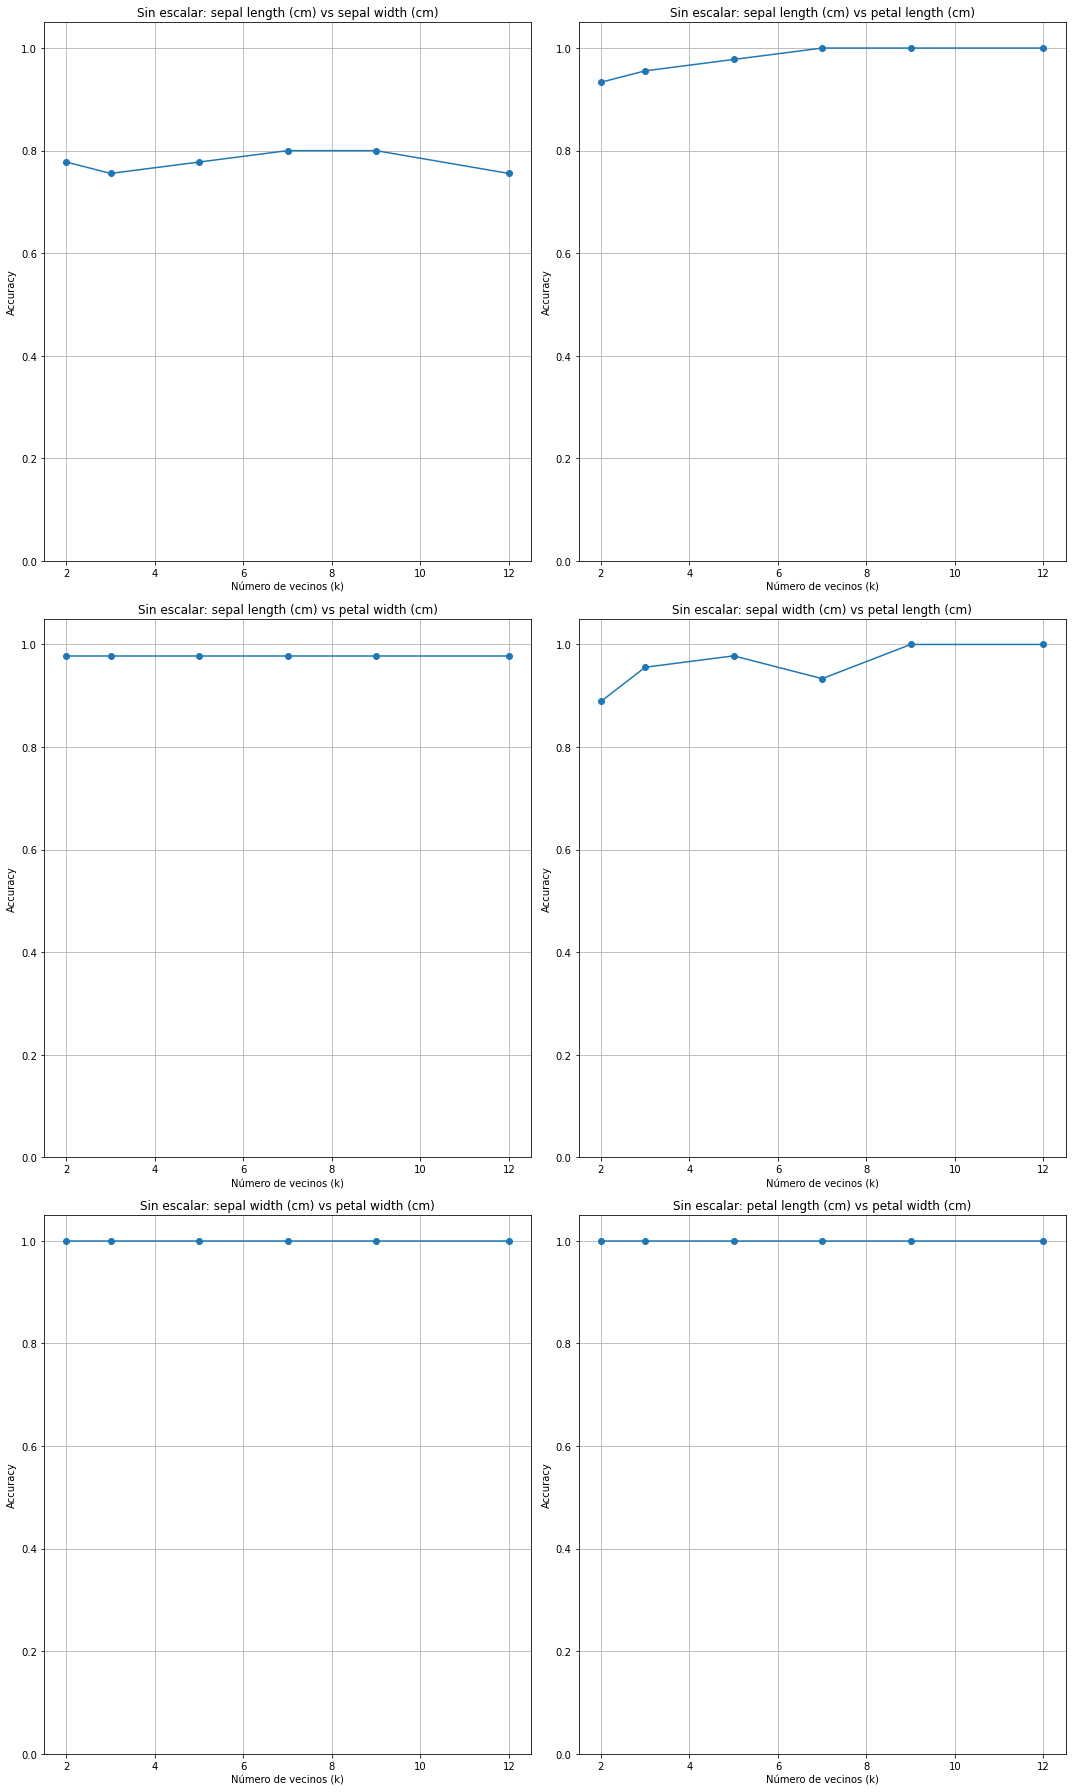

In [15]:
# Experimento 1: sin escalar
evaluate_knn_accuracy(X, y, title_prefix="Sin escalar")

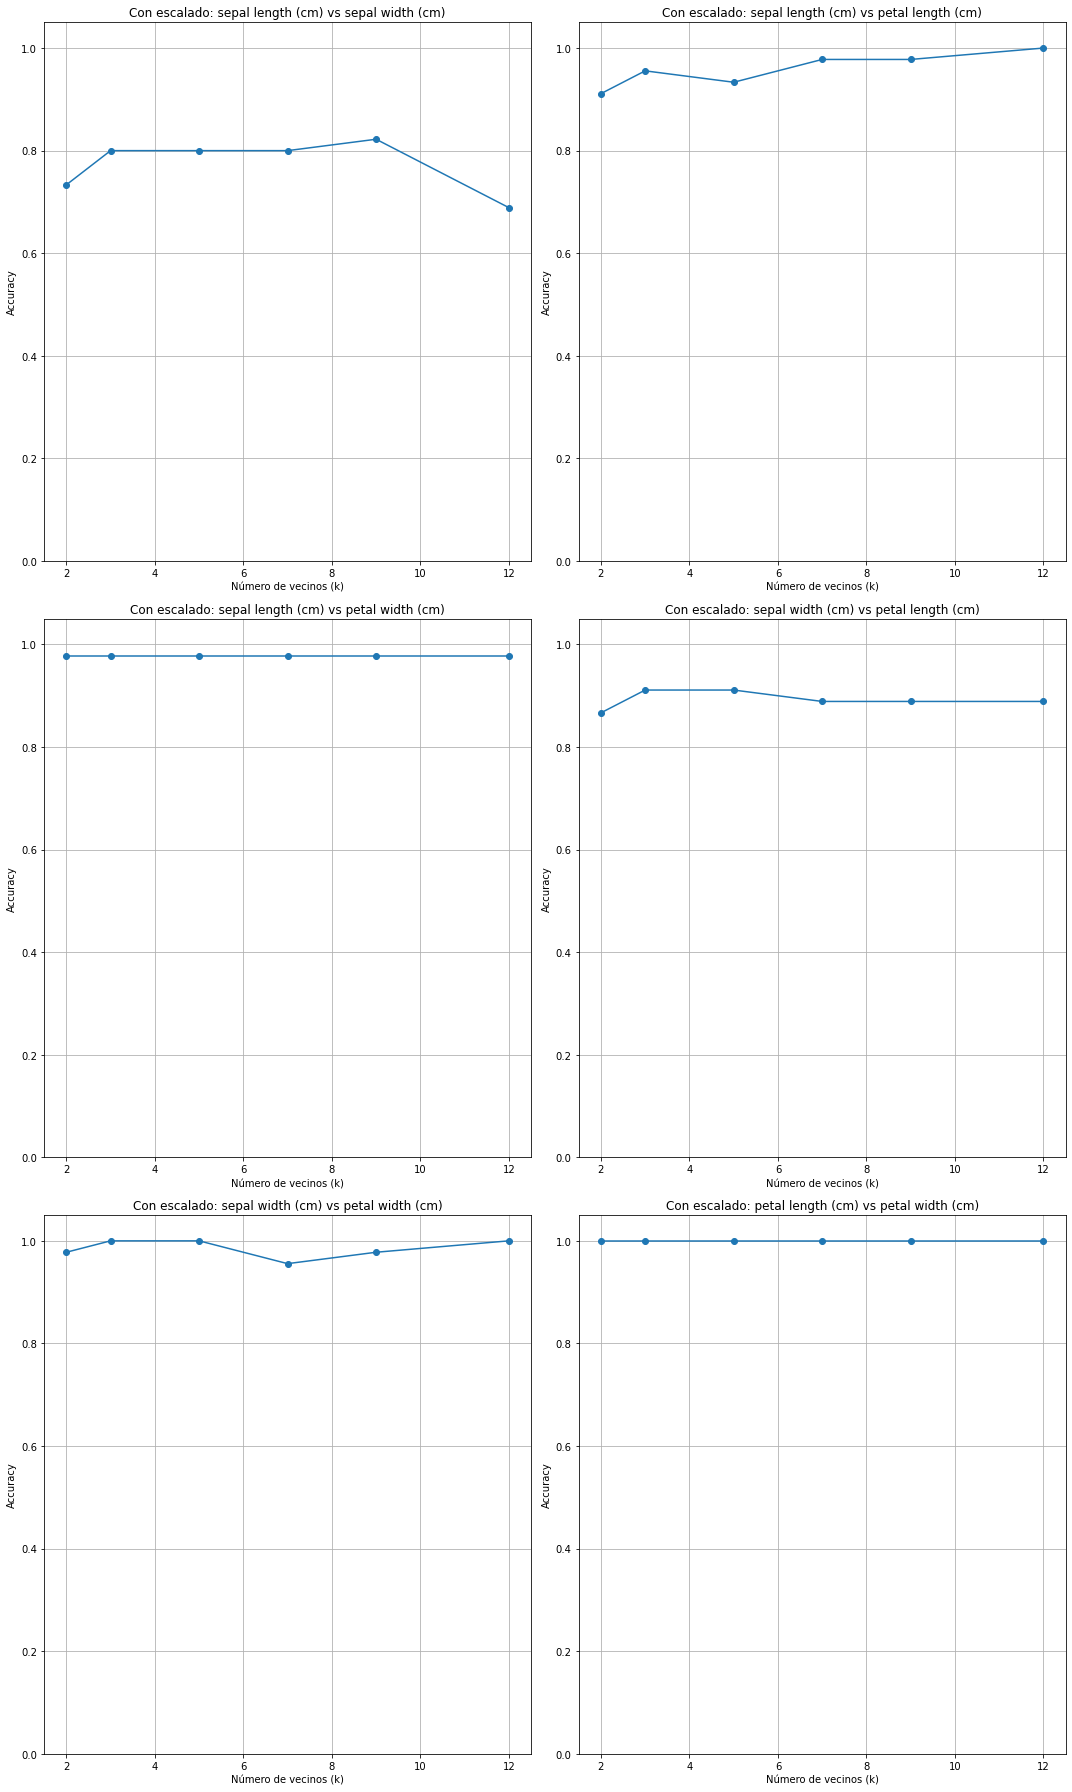

In [16]:
# Experimento 2: con escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
evaluate_knn_accuracy(X_scaled, y, title_prefix="Con escalado")

In [17]:
def plot_knn_decision_boundaries(X, y, title_prefix):
    n_rows = len(combinations)
    n_cols = len(k_values)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))

    for row_idx, (i, j) in enumerate(combinations):
        X_pair = X[:, [i, j]]
        X_train, X_test, y_train, y_test = train_test_split(X_pair, y, test_size=0.3, random_state=42)

        for col_idx, k in enumerate(k_values):
            clf = KNeighborsClassifier(n_neighbors=k)
            clf.fit(X_train, y_train)

            x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
            y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
            xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                                 np.linspace(y_min, y_max, 200))

            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)

            cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
            cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

            ax = axes[row_idx, col_idx]
            ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=20)
            ax.set_title(f"{feature_names[i]} vs {feature_names[j]}\nk={k}", fontsize=8)
            ax.set_xlabel(feature_names[i], fontsize=7)
            ax.set_ylabel(feature_names[j], fontsize=7)
            ax.tick_params(labelsize=6)

    plt.tight_layout()
    plt.show()

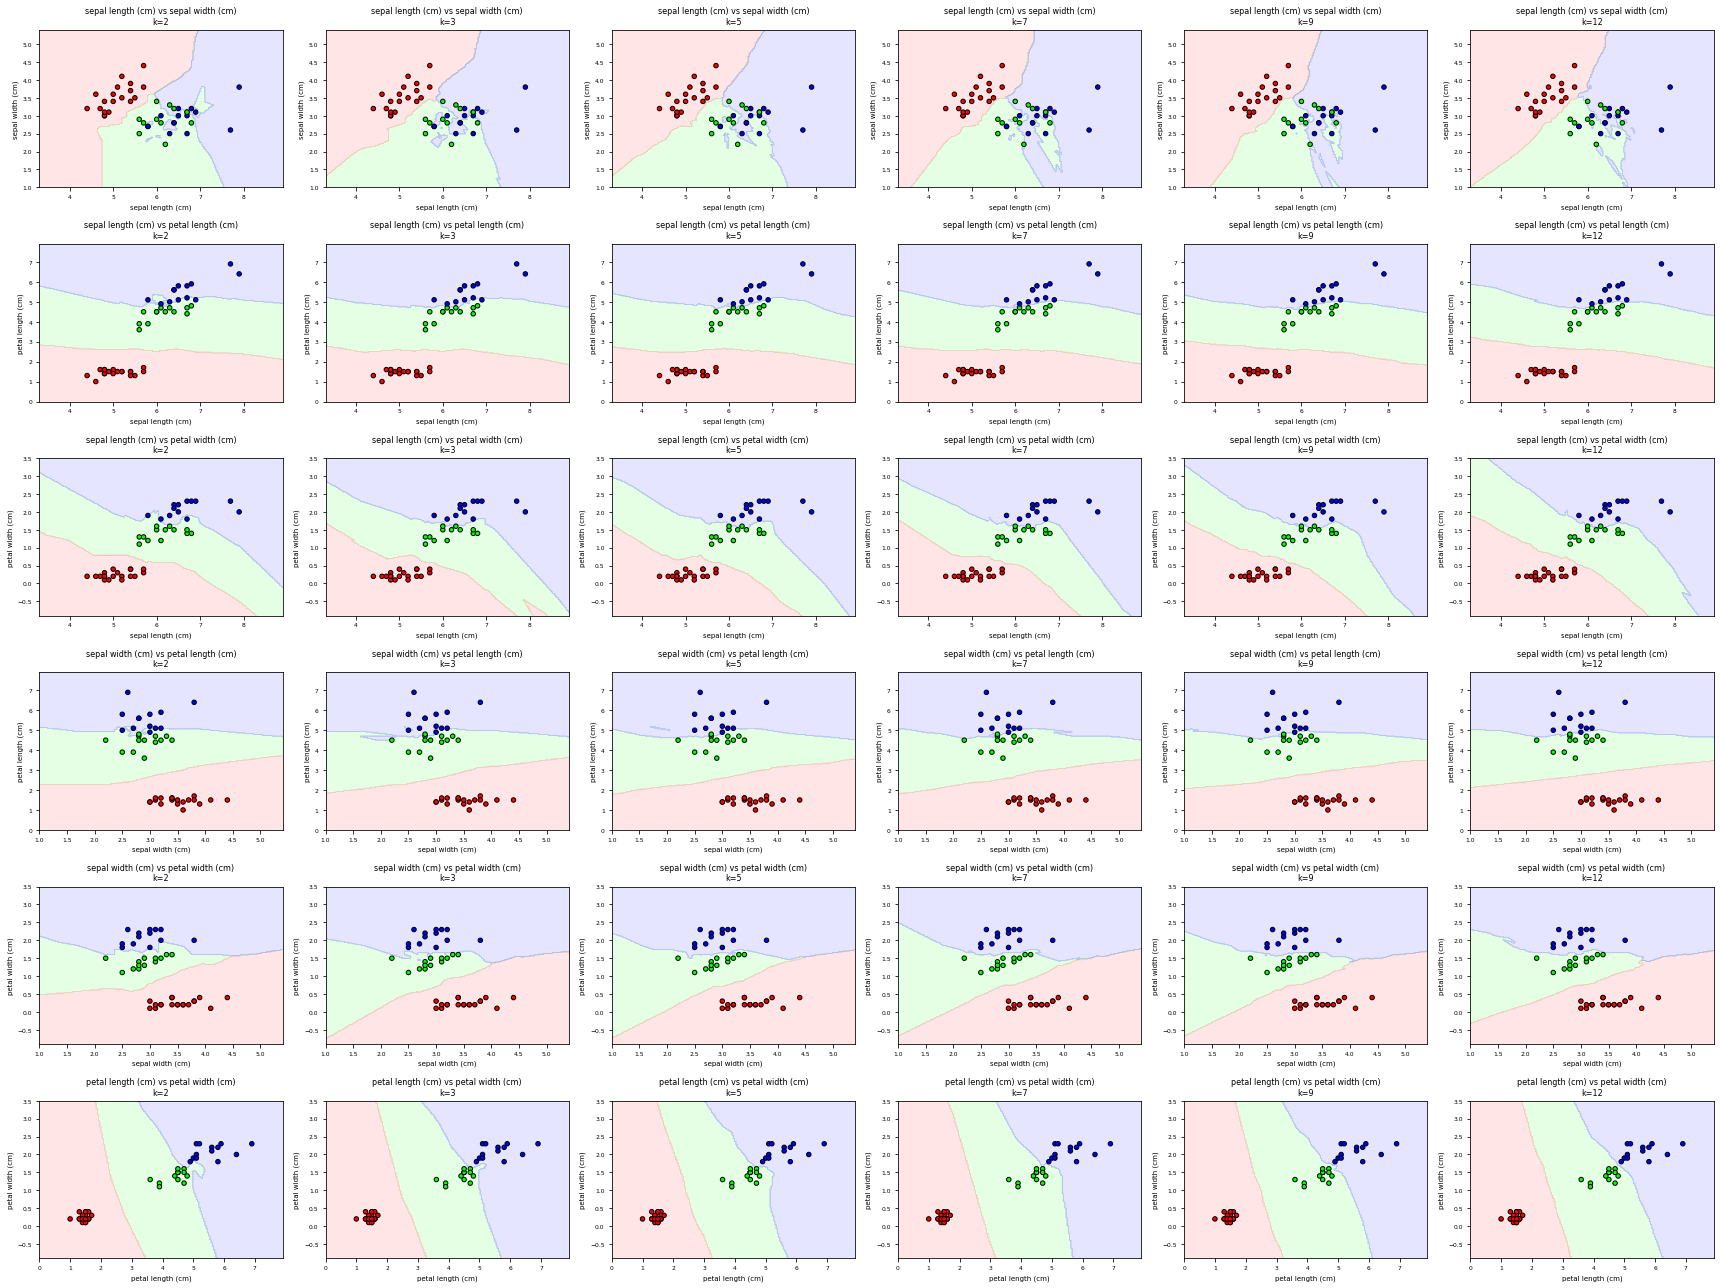

In [18]:
# Experimento 1: sin escalar
plot_knn_decision_boundaries(X, y, title_prefix="Sin escalar")

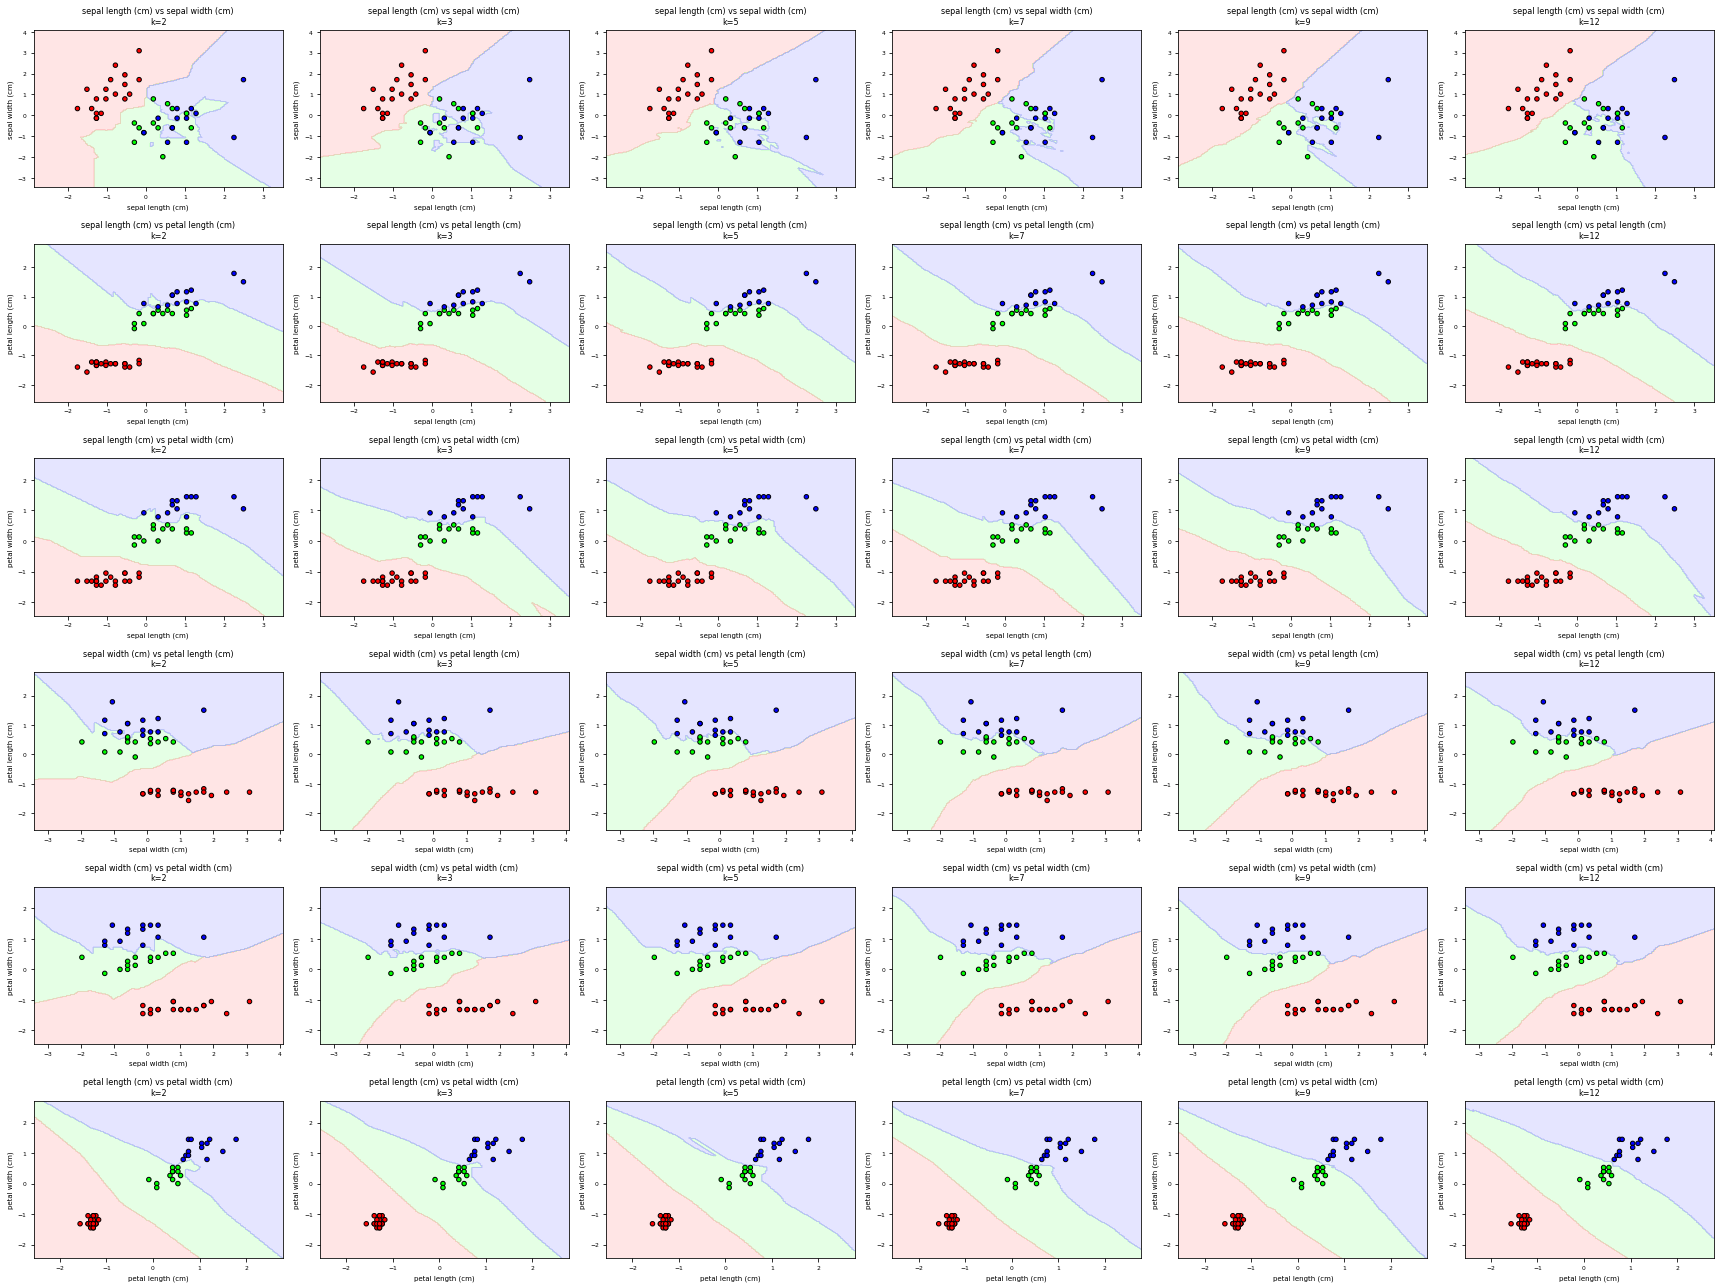

In [19]:
# Experimento 2: con escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
plot_knn_decision_boundaries(X_scaled, y, title_prefix="Con escalado")

In [25]:
# Función para graficar matrices de confusión
def plot_confusion_matrices(X, y, title_prefix):
    n_rows = len(combinations)
    n_cols = len(k_values)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(3 * n_cols, 3 * n_rows))

    for row_idx, (i, j) in enumerate(combinations):
        X_pair = X[:, [i, j]]
        X_train, X_test, y_train, y_test = train_test_split(X_pair, y, test_size=0.3, random_state=42)

        for col_idx, k in enumerate(k_values):
            clf = KNeighborsClassifier(n_neighbors=k)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred)
            ax = axes[row_idx, col_idx]
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
            disp.plot(ax=ax, colorbar=False)
            ax.set_title(f"{feature_names[i]} vs {feature_names[j]}\nk={k}", fontsize=7)
            ax.set_xlabel("Predicted label", fontsize=6)
            ax.set_ylabel("True label", fontsize=6)
            ax.tick_params(labelsize=6)

    plt.tight_layout()
    plt.show()

In [27]:
class_names = iris.target_names

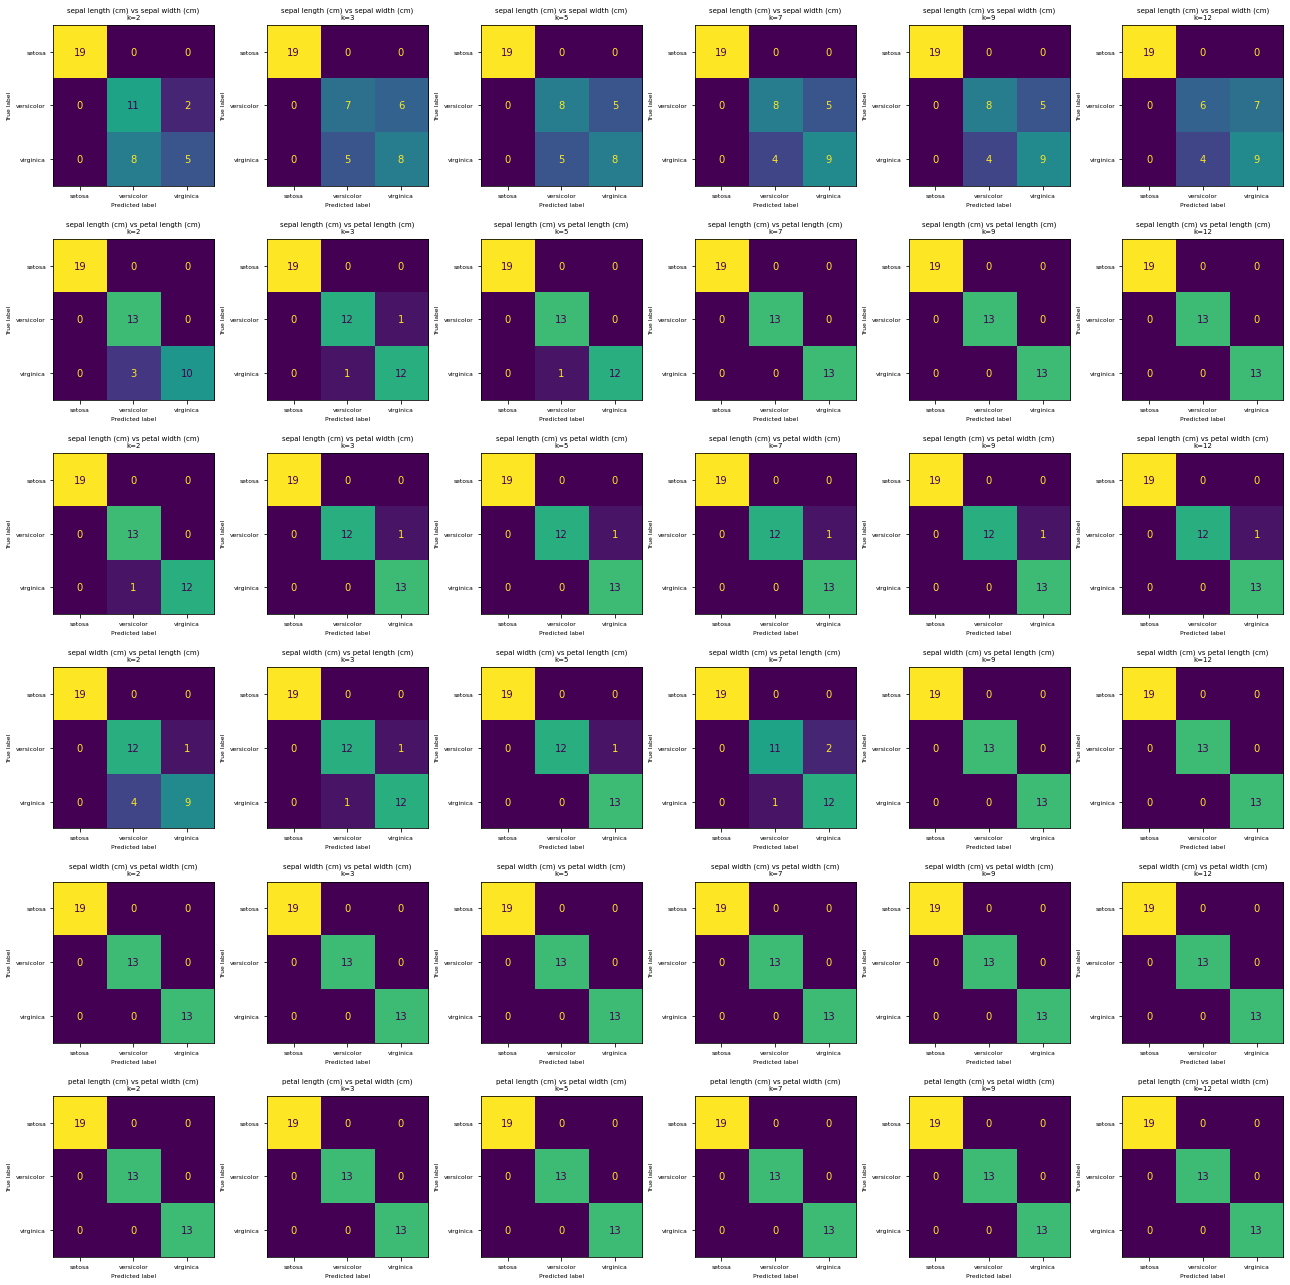

In [28]:
plot_confusion_matrices(X, y, title_prefix="Sin escalar")

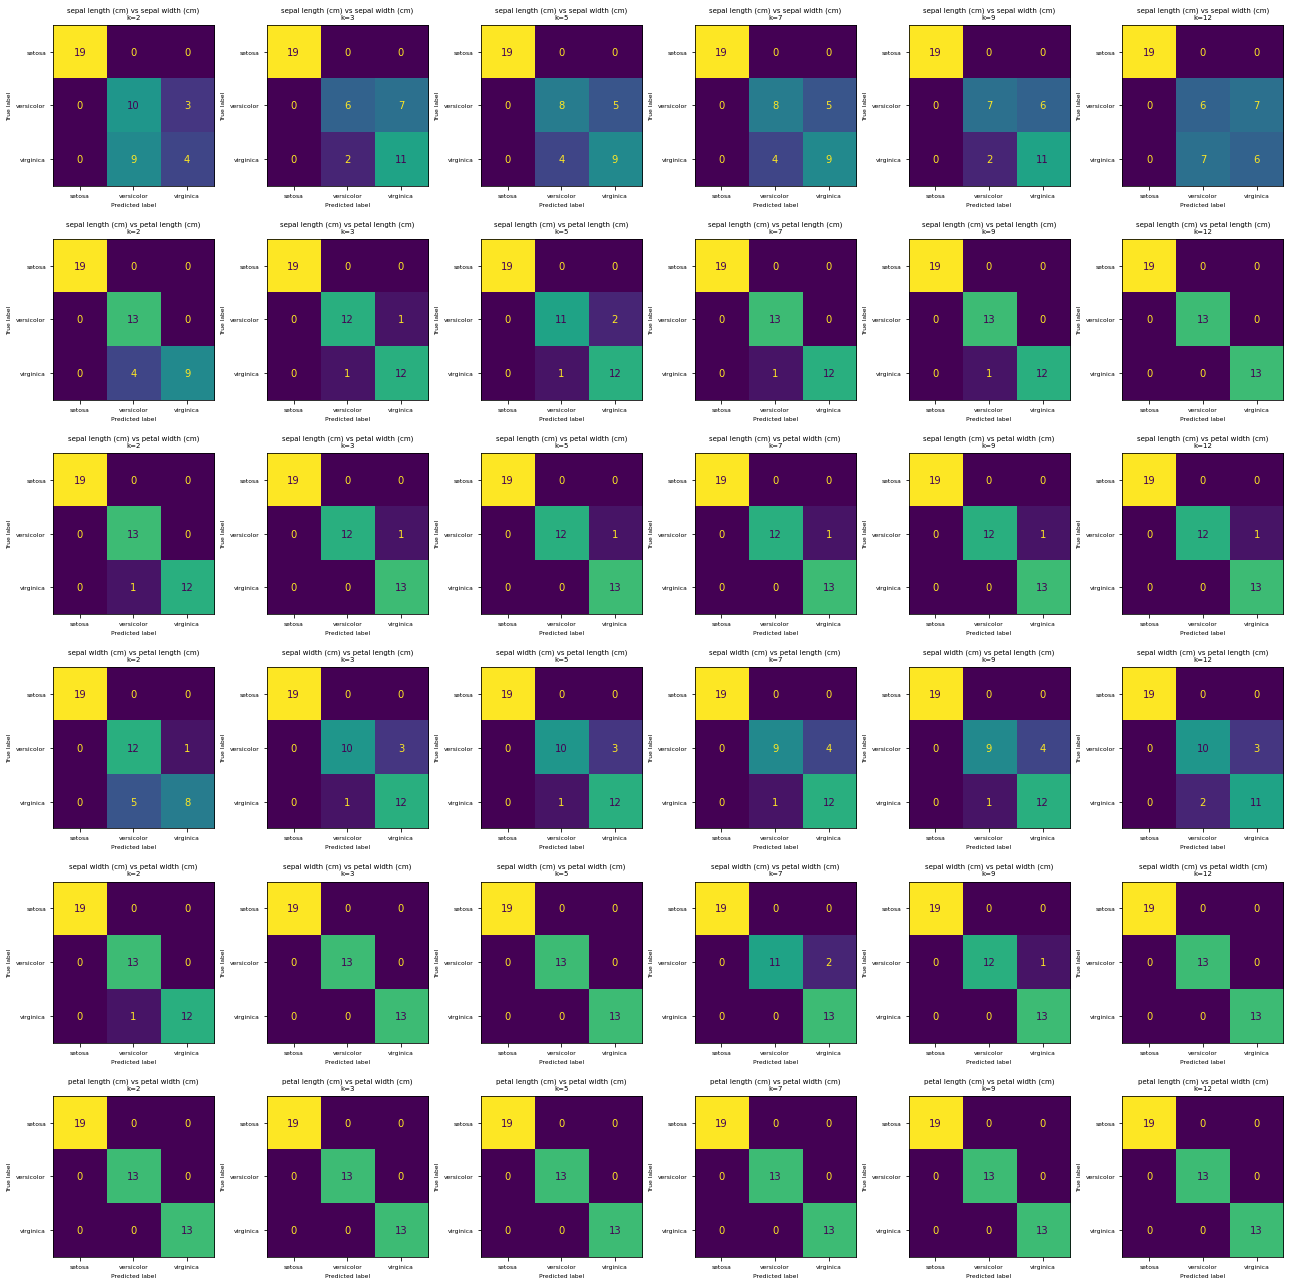

In [29]:
plot_confusion_matrices(X_scaled, y, title_prefix="Con escalado")

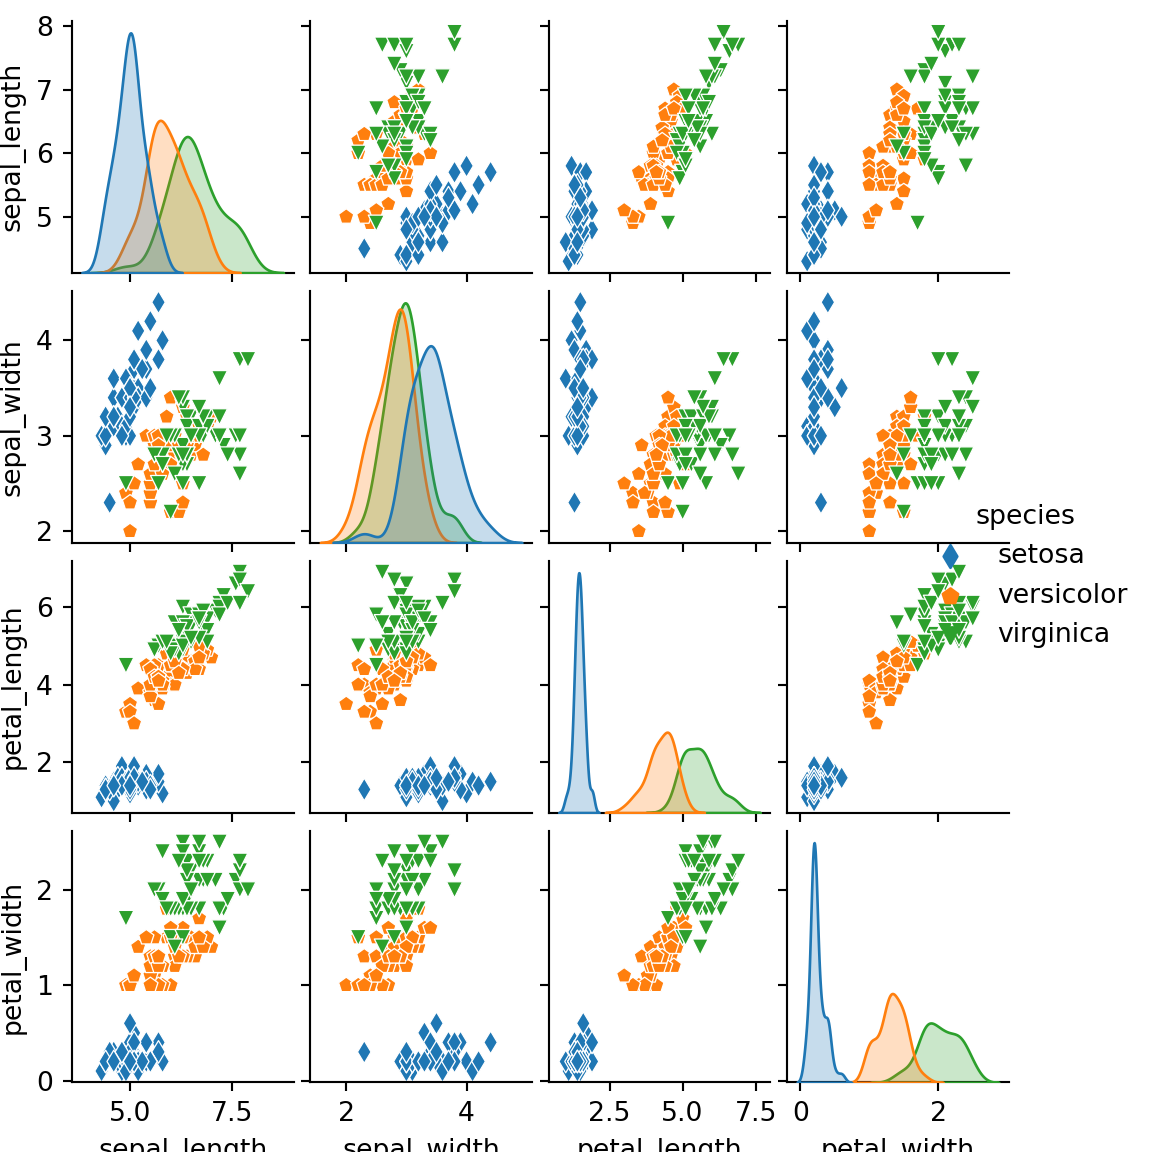